<a href="https://colab.research.google.com/github/onecme/dataMining/blob/main/TI09_ElyasRandiRenaldi_0110223277_PratikumMandiri3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Mengimport package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from google.colab import drive

In [26]:
# Mengakses google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Membuat dataframe
df = pd.read_csv('/content/drive/MyDrive/dataset/Students_data.csv')

In [28]:
# Menampil seluruh data
df

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
0,1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0
1,1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0
2,1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1
3,1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0
4,1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1241,A,female,1,88.34,87,83,92,98,93,86,90,M,B,A,0,1
101,1242,B,male,1,89.84,98,77,95,98,96,88,100,A,B,A,0,1
102,1243,B,male,1,88.82,83,80,91,98,93,95,71,T,B,A,0,2
103,1244,A,male,1,86.60,92,82,91,99,94,82,78,S,B,A,0,2


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   105 non-null    int64  
 1   class                105 non-null    object 
 2   gender               105 non-null    object 
 3   race                 105 non-null    int64  
 4   GPA                  105 non-null    float64
 5   Algebra              105 non-null    int64  
 6   Calculus1            105 non-null    int64  
 7   Calculus2            105 non-null    int64  
 8   Statistics           105 non-null    int64  
 9   Probability          105 non-null    int64  
 10  Measure              105 non-null    int64  
 11  Functional_analysis  105 non-null    int64  
 12  from1                105 non-null    object 
 13  from2                105 non-null    object 
 14  from3                105 non-null    object 
 15  from4                105 non-null    int

In [30]:
# Statistik deskripsi
df.describe()

,ID,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from4,y
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,1193.000000,1.790476,82.957048,76.057143,71.961905,78.942857,85.133333,83.876190,80.761905,75.323810,0.504762,0.714286
std,30.454885,1.673867,6.053187,11.722618,12.197039,14.997326,10.269509,10.514363,10.296119,13.003324,0.889293,0.828742
min,1141.000000,1.000000,63.490000,46.000000,38.000000,17.000000,51.000000,29.000000,54.000000,9.000000,0.000000,0.000000
25%,1167.000000,1.000000,79.340000,67.000000,64.000000,71.000000,80.000000,79.000000,74.000000,67.000000,0.000000,0.000000
50%,1193.000000,1.000000,84.110000,76.000000,73.000000,83.000000,87.000000,85.000000,81.000000,76.000000,0.000000,0.000000
75%,1219.000000,1.000000,87.300000,84.000000,80.000000,91.000000,92.000000,92.000000,89.000000,85.000000,0.000000,1.000000
max,1245.000000,7.000000,93.710000,98.000000,100.000000,99.000000,100.000000,97.000000,100.000000,100.000000,3.000000,2.000000


##**Membersihkan**

In [31]:
# menghitung nilai null
df.isnull().sum()

,0
ID,0
class,0
gender,0
race,0
GPA,0
Algebra,0
Calculus1,0
Calculus2,0
Statistics,0
Probability,0


In [32]:
# Mehitung data duplikat
df.duplicated().sum()

0

In [33]:
# Mengindentifikasi nilai kolom yang unik
print('Unique kolom class : ', df['class'].unique())
print('Unique kolom from1 : ', df['from1'].unique())
print('Unique kolom from2 : ', df['from2'].unique())
print('Unique kolom from3 : ', df['from3'].unique())

Unique kolom class :  ['A' 'B']
Unique kolom from1 :  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'U' 'V' 'T' 'Z' 'W' 'X' 'Y' 'AA' 'AB']
Unique kolom from2 :  ['A' 'B']
Unique kolom from3 :  ['A' 'C' 'D' 'B' 'S']


In [34]:
# Menghapus kolom yang tidak diperlukan karena nilai yang memiliki sifat ambigu
colums_to_drop = ['class', 'from1', 'from2', 'from3']

df.drop(columns=colums_to_drop, inplace=True)

In [35]:
df

,ID,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from4,y
0,1141,male,1,73.47,64,81,87,60,74,71,60,3,0
1,1142,female,1,71.22,57,50,51,51,55,62,61,2,0
2,1143,female,2,74.56,47,48,71,60,61,68,64,0,1
3,1144,female,1,72.89,46,72,38,60,29,54,51,0,0
4,1145,female,1,70.11,49,45,63,60,66,66,61,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1241,female,1,88.34,87,83,92,98,93,86,90,0,1
101,1242,male,1,89.84,98,77,95,98,96,88,100,0,1
102,1243,male,1,88.82,83,80,91,98,93,95,71,0,2
103,1244,male,1,86.60,92,82,91,99,94,82,78,0,2


In [36]:
# Menguabah nilai yang tadinya bertipe objek ke numerik
replacements = {
    'gender': {'male':1, 'female':0}
}

df.replace(replacements, inplace=True)

<ipython-input-36-d67df911e470>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(replacements, inplace=True)


In [37]:
df

,ID,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from4,y
0,1141,1,1,73.47,64,81,87,60,74,71,60,3,0
1,1142,0,1,71.22,57,50,51,51,55,62,61,2,0
2,1143,0,2,74.56,47,48,71,60,61,68,64,0,1
3,1144,0,1,72.89,46,72,38,60,29,54,51,0,0
4,1145,0,1,70.11,49,45,63,60,66,66,61,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1241,0,1,88.34,87,83,92,98,93,86,90,0,1
101,1242,1,1,89.84,98,77,95,98,96,88,100,0,1
102,1243,1,1,88.82,83,80,91,98,93,95,71,0,2
103,1244,1,1,86.60,92,82,91,99,94,82,78,0,2


In [38]:
# mencari nilai minimum
min_gpa = df['GPA'].min()
min_algebra = df['Algebra'].min()
min_calculus1 = df['Calculus1'].min()
min_calculus2 = df['Calculus2'].min()
min_statistics = df['Statistics'].min()
min_probability = df['Probability'].min()
min_measure = df['Measure'].min()
min_functional_analysis = df['Functional_analysis'].min()

print("Minimum gpa : ",  min_gpa)
print("Minimum algebra : ", min_algebra)
print("Minimum calculus1 : ", min_calculus1)
print("Minimum calculus2 : ",min_calculus2)
print("Minimum statistics : ",min_statistics)
print("Minimum probability : ",min_probability)
print("Minimum measure : ",min_measure)
print("Minimum fuctional analisis : ",min_functional_analysis)

Minimum gpa :  63.49
Minimum algebra :  46
Minimum calculus1 :  38
Minimum calculus2 :  17
Minimum statistics :  51
Minimum probability :  29
Minimum measure :  54
Minimum fuctional analisis :  9


In [39]:
# mencari nilai maximum
max_gpa = df['GPA'].max()
max_algebra = df['Algebra'].max()
max_calculus1 = df['Calculus1'].max()
max_calculus2 = df['Calculus2'].max()
max_statistics = df['Statistics'].max()
max_probability = df['Probability'].max()
max_measure = df['Measure'].max()
max_functional_analysis = df['Functional_analysis'].max()

print("Maximum gpa : ", max_gpa)
print("Maximum algebra : ", max_algebra)
print("Maximum calculus1 : ", max_calculus1)
print("Maximum calculus2 : ", max_calculus2)
print("Maximum statistics : ", max_statistics)
print("Maximum probability : ", max_probability)
print("Maximum measure : ", max_measure)
print("Maximum functional analisis : ", max_functional_analysis)

Maximum gpa :  93.71
Maximum algebra :  98
Maximum calculus1 :  100
Maximum calculus2 :  99
Maximum statistics :  100
Maximum probability :  97
Maximum measure :  100
Maximum functional analisis :  100


In [40]:
# menghitung rata-rata
mean_gpa = round(df['GPA'].mean(), 2)
mean_algebra = round(df['Algebra'].mean(), 2)
mean_calculus1 = round(df['Calculus1'].mean(), 2)
mean_calculus2 = round(df['Calculus2'].mean(), 2)
mean_statistics = round(df['Statistics'].mean(), 2)
mean_probability = round(df['Probability'].mean(), 2)
mean_measure = round(df['Measure'].mean(), 2)
mean_functional_analysis = round(df['Functional_analysis'].mean(), 2)

print("rata-rata gpa : ", mean_gpa)
print("rata-rata algebra : ", mean_algebra)
print("rata-rata calculus1 : ", mean_calculus1)
print("rata-rata calculus2 : ", mean_calculus2)
print("rata-rata statistics : ", mean_statistics)
print("rata-rata probability : ", mean_probability)
print("rata-rata measure : ", mean_measure)
print("rata-rata functional analisis : ", mean_functional_analysis)

rata-rata gpa :  82.96
rata-rata algebra :  76.06
rata-rata calculus1 :  71.96
rata-rata calculus2 :  78.94
rata-rata statistics :  85.13
rata-rata probability :  83.88
rata-rata measure :  80.76
rata-rata functional analisis :  75.32


In [41]:
# menghitung median
median_gpa = round(df['GPA'].median(), 2)
median_algebra = round(df['Algebra'].median(), 2)
median_calculus1 = round(df['Calculus1'].median(), 2)
median_calculus2 = round(df['Calculus2'].median(), 2)
median_statistics = round(df['Statistics'].median(), 2)
median_probability = round(df['Probability'].median(), 2)
median_measure = round(df['Measure'].median(), 2)
median_functional_analysis = round(df['Functional_analysis'].median(), 2)

print("Median gpa : ", median_gpa)
print("Median algebra : ", median_algebra)
print("Median calculus1 : ", median_calculus1)
print("Median calculus2 : ", median_calculus2)
print("Median statistics : ", median_statistics)
print("Median probability : ", median_probability)
print("Median measure : ", median_measure)
print("Median functional analisis : ", median_functional_analysis)

Median gpa :  84.11
Median algebra :  76.0
Median calculus1 :  73.0
Median calculus2 :  83.0
Median statistics :  87.0
Median probability :  85.0
Median measure :  81.0
Median functional analisis :  76.0


In [42]:
# mencari nilai modus
modus_gpa = stat.mode(df['GPA'])
modus_algebra = stat.mode(df['Algebra'])
modus_calculus1 = stat.mode(df['Calculus1'])
modus_calculus2 = stat.mode(df['Calculus2'])
modus_statistics = stat.mode(df['Statistics'])
modus_probability = stat.mode(df['Probability'])
modus_measure = stat.mode(df['Measure'].mode())
modus_functional_analysis = stat.mode(df['Functional_analysis'])

print("Modus gpa : ", modus_gpa)
print("Modus algebra : ", modus_algebra)
print("Modus calculus1 : ", modus_calculus1)
print("Modus calculus2 : ", modus_calculus2)
print("Modus statistics : ", modus_statistics)
print("Modus probability : ", modus_probability)
print("Modus measure : ", modus_measure)
print("Modus functional analisis : ", modus_functional_analysis)

Modus gpa :  77.53
Modus algebra :  82
Modus calculus1 :  60
Modus calculus2 :  71
Modus statistics :  92
Modus probability :  82
Modus measure :  87
Modus functional analisis :  64


##**Korelasi**

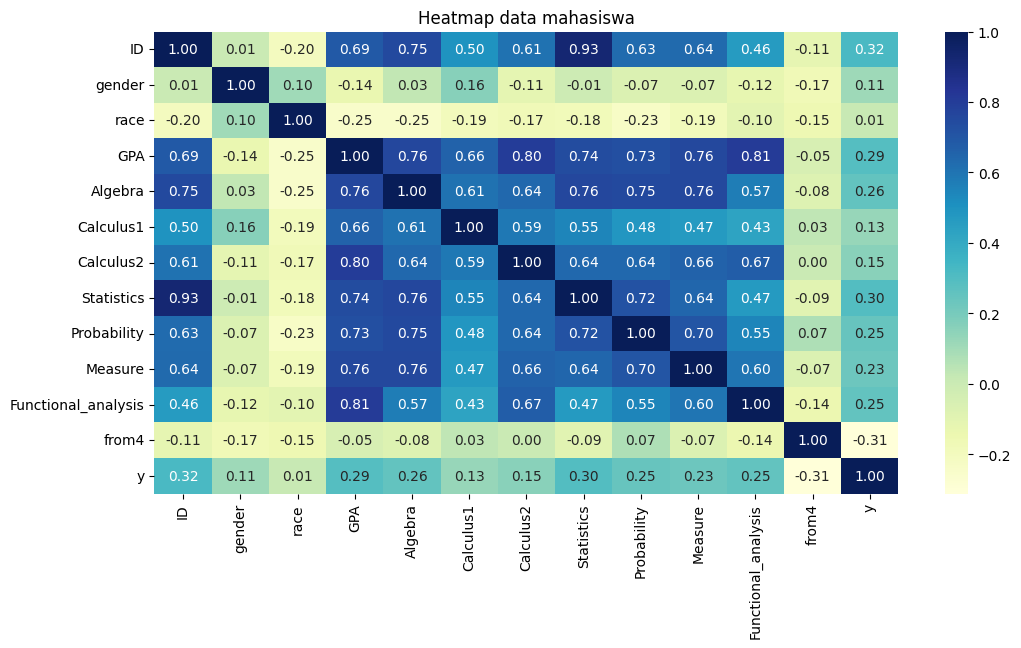

In [43]:
# Membuat heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Heatmap data mahasiswa")

# Menampilkan
plt.show()

##**Boxplot**

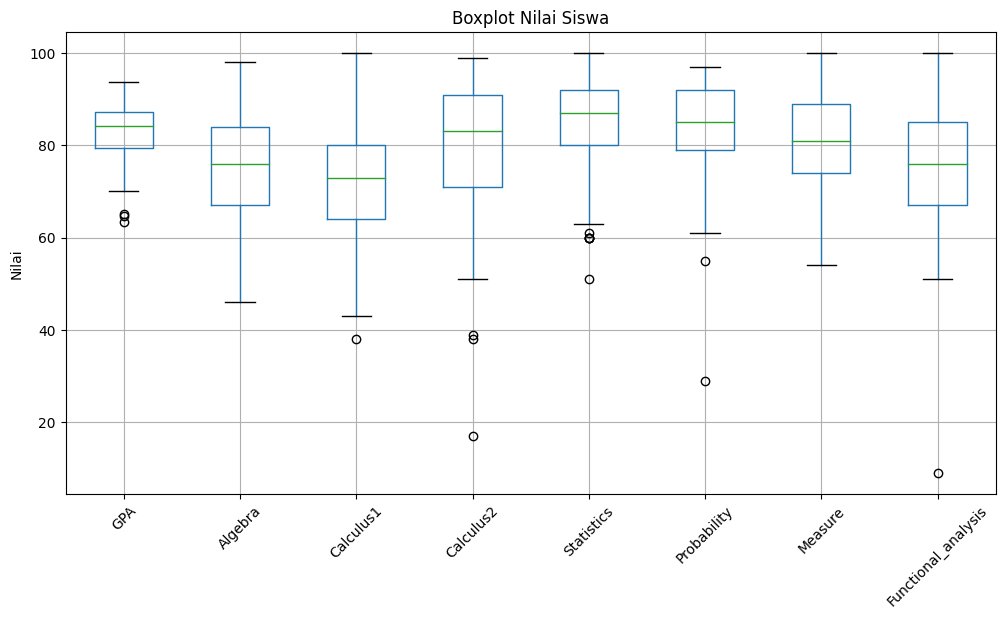

In [44]:
# Membuat boxplot

plt.figure(figsize=(12, 6))
df[['GPA', 'Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability',
    'Measure', 'Functional_analysis']].boxplot()

plt.title("Boxplot Nilai Siswa")
plt.xticks(rotation=45)
plt.ylabel("Nilai")

plt.show()

##**Diagram**

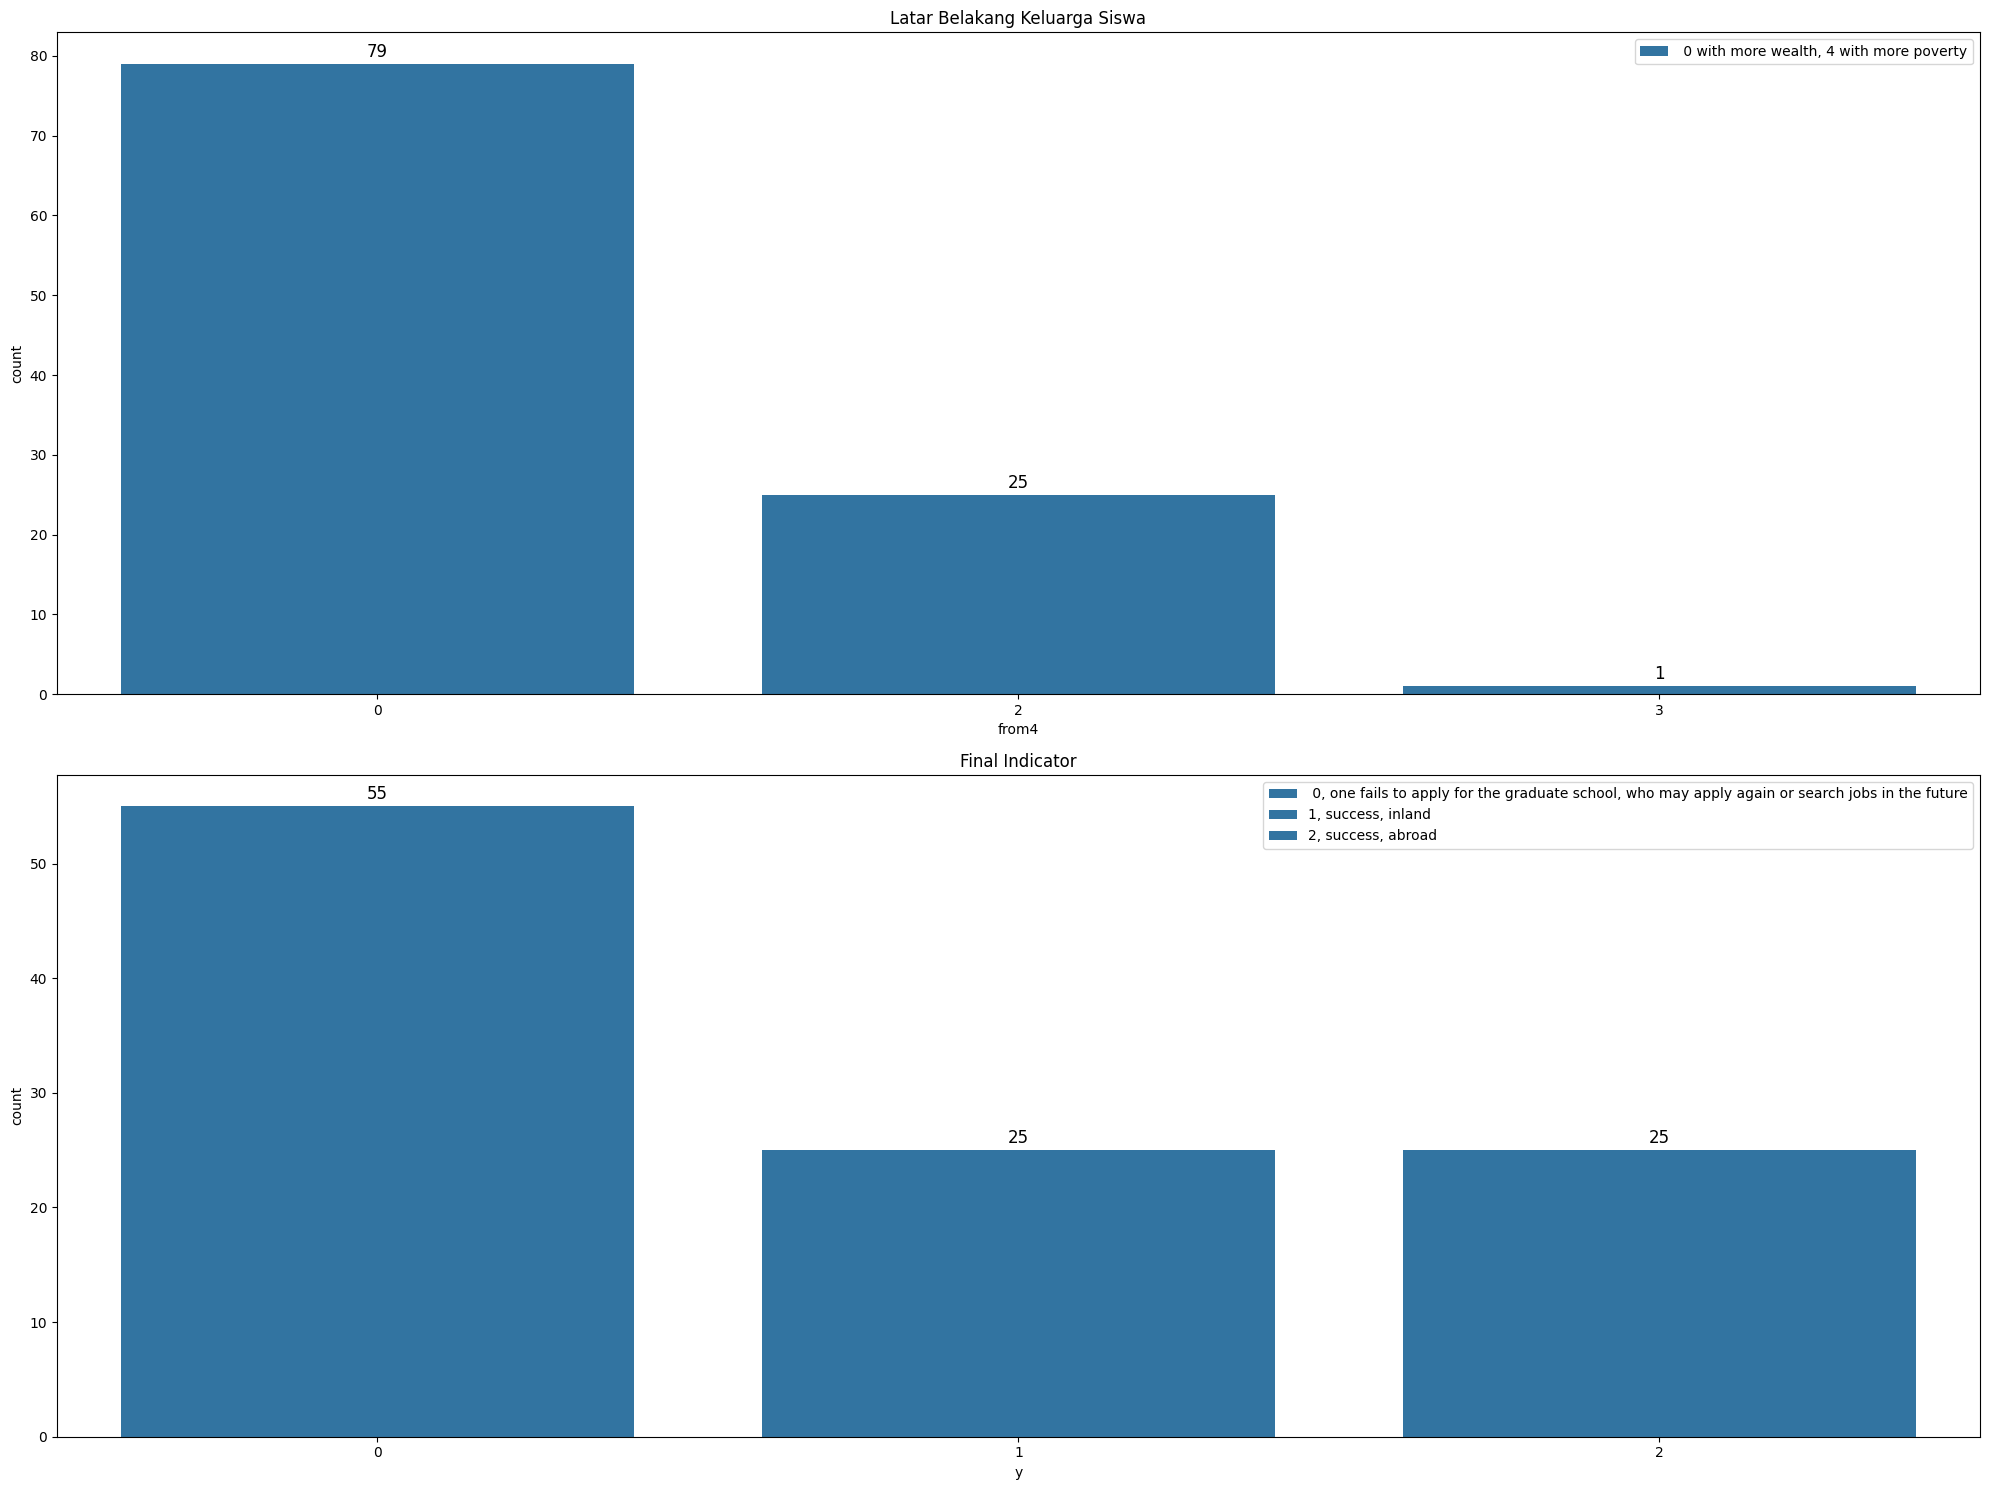

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))

axes = axes.flatten()

# Membuat histogram
sns.countplot(x='from4', data=df, ax= axes[0])
axes[0].set_title("Latar Belakang Keluarga Siswa")

# Menambahkan legend
axes[0].legend([' 0 with more wealth, 4 with more poverty'], loc= 'upper right')

# Menambahkan annotate
for p in axes[0].patches:
  axes[0].annotate(
      f'{int(p.get_height())}',
      (p.get_x() + p.get_width() /2., p.get_height()),
      ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
      textcoords='offset points'
  )

# Membuat histogram
sns.countplot(x='y', data=df, ax= axes[1])
axes[1].set_title("Final Indicator")

# Menambahkan legend
axes[1].legend(handles = axes[1].patches, labels=[' 0, one fails to apply for the graduate school, who may apply again or search jobs in the future',
                '1, success, inland',
                '2, success, abroad'],
               loc= 'upper right')

# Menambahkan annotate
for p in axes[1].patches:
  axes[1].annotate(
      f'{int(p.get_height())}',
      (p.get_x() + p.get_width() /2., p.get_height()),
      ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
      textcoords='offset points'
  )

plt.tight_layout()
plt.show()

##**Normalization**

In [46]:
# Membuat Min-Max Normalization

# Inisialisasi objek MixMaxscaler
scaler = MinMaxScaler()

# fit dan transform dengan menggunakan Min-Max Scalling
scaled_data = scaler.fit_transform(df[['GPA', 'Algebra', 'Calculus1', 'Calculus2', 'Statistics',
                                       'Probability', 'Measure', 'Functional_analysis']])

print(scaled_data)

[[0.33024487 0.34615385 0.69354839 0.85365854 0.18367347 0.66176471
  0.36956522 0.56043956]
 [0.25579087 0.21153846 0.19354839 0.41463415 0.         0.38235294
  0.17391304 0.57142857]
 [0.3663137  0.01923077 0.16129032 0.65853659 0.18367347 0.47058824
  0.30434783 0.6043956 ]
 [0.31105228 0.         0.5483871  0.25609756 0.18367347 0.
  0.         0.46153846]
 [0.21906023 0.05769231 0.11290323 0.56097561 0.18367347 0.54411765
  0.26086957 0.57142857]
 [0.05129054 0.26923077 0.35483871 0.26829268 0.20408163 0.52941176
  0.43478261 0.56043956]
 [0.4506949  0.26923077 0.08064516 0.42682927 0.24489796 0.61764706
  0.39130435 0.72527473]
 [0.04169424 0.26923077 0.         0.52439024 0.24489796 0.60294118
  0.30434783 0.46153846]
 [0.47749835 0.28846154 0.35483871 0.59756098 0.34693878 0.75
  0.52173913 0.68131868]
 [0.4305096  0.26923077 0.37096774 0.52439024 0.36734694 0.64705882
  0.13043478 0.58241758]
 [0.44142952 0.28846154 0.4516129  0.53658537 0.36734694 0.52941176
  0.32608696 0.6

##**Z-Score Transformation**

In [47]:
# Inisialisasi objek standardscaler
scaler = StandardScaler()

# fit dan transformasi data menggunakan Z-score Transformation
z_score_data = scaler.fit_transform(df[['GPA', 'Algebra', 'Calculus1', 'Calculus2', 'Statistics',
                                       'Probability', 'Measure', 'Functional_analysis']])

print(z_score_data)

[[-1.57479854e+00 -1.03346973e+00  7.44561324e-01  5.39815336e-01
  -2.45911240e+00 -9.43809765e-01 -9.52662300e-01 -1.18410530e+00]
 [-1.94828636e+00 -1.63346993e+00 -1.80922910e+00 -1.87212553e+00
  -3.33969642e+00 -2.75952865e+00 -1.83097047e+00 -1.10683305e+00]
 [-1.39386444e+00 -2.49061307e+00 -1.97398977e+00 -5.32158381e-01
  -2.45911240e+00 -2.18614374e+00 -1.24543169e+00 -8.75016286e-01]
 [-1.67107540e+00 -2.57632739e+00  3.13829852e-03 -2.74310417e+00
  -2.45911240e+00 -5.24419659e+00 -2.61168884e+00 -1.87955559e+00]
 [-2.13254035e+00 -2.31918445e+00 -2.22113078e+00 -1.06814524e+00
  -2.45911240e+00 -1.70832298e+00 -1.44061128e+00 -1.10683305e+00]
 [-2.97413290e+00 -1.37632699e+00 -9.85425735e-01 -2.67610581e+00
  -2.36126973e+00 -1.80388713e+00 -6.59892910e-01 -1.18410530e+00]
 [-9.70578248e-01 -1.37632699e+00 -2.38589145e+00 -1.80512717e+00
  -2.16558440e+00 -1.23050222e+00 -8.55072503e-01 -2.50214918e-02]
 [-3.02227133e+00 -1.37632699e+00 -2.79779313e+00 -1.26914031e+00
  -

##**Scalling Decimal**

In [48]:
scaling_factor = 100

# melakukan tranformation Decimal Scaling
scaled_data = df[['GPA', 'Algebra', 'Calculus1', 'Calculus2', 'Statistics',
                  'Probability', 'Measure', 'Functional_analysis']] / scaling_factor

print(scaled_data)

        GPA  Algebra  Calculus1  Calculus2  Statistics  Probability  Measure  \
0    0.7347     0.64       0.81       0.87        0.60         0.74     0.71   
1    0.7122     0.57       0.50       0.51        0.51         0.55     0.62   
2    0.7456     0.47       0.48       0.71        0.60         0.61     0.68   
3    0.7289     0.46       0.72       0.38        0.60         0.29     0.54   
4    0.7011     0.49       0.45       0.63        0.60         0.66     0.66   
..      ...      ...        ...        ...         ...          ...      ...   
100  0.8834     0.87       0.83       0.92        0.98         0.93     0.86   
101  0.8984     0.98       0.77       0.95        0.98         0.96     0.88   
102  0.8882     0.83       0.80       0.91        0.98         0.93     0.95   
103  0.8660     0.92       0.82       0.91        0.99         0.94     0.82   
104  0.9371     0.93       0.97       0.99        1.00         0.97     0.90   

     Functional_analysis  
0           